# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [98]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [99]:
# Your code here
# Load the dataset into a pandas DataFrame
df=pd.read_csv('data/ames.csv',index_col=0)
# Display the first few rows to ensure it's loaded correctly
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [100]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [101]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [102]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

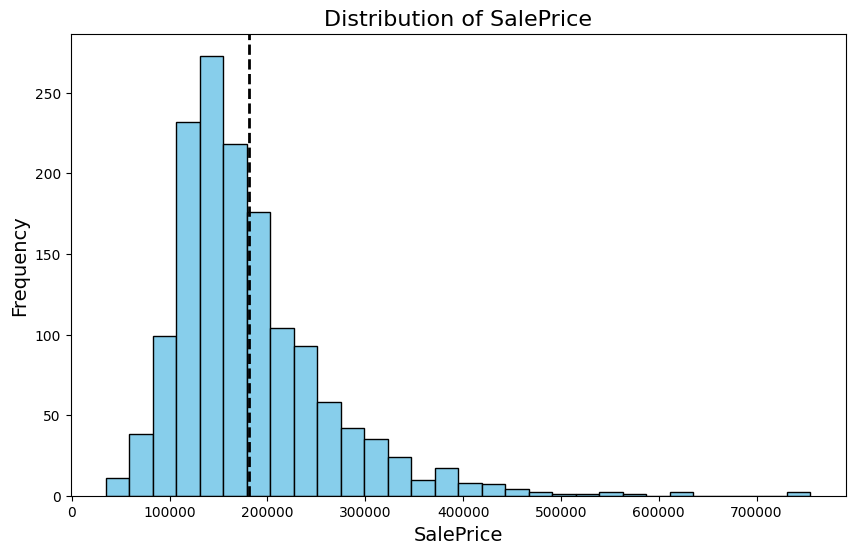

In [127]:
# Your code here
#create the histogram for sale price
plt.figure(figsize=(10,6))
plt.hist(df['SalePrice'],bins=30,color='skyblue',edgecolor='black')

#add a vertical line for the mean
mean_saleprice= df['SalePrice'].mean()
plt.axvline(mean_saleprice,color='black',linestyle='dashed',linewidth=2)

#Add title and labels
plt.title('Distribution of SalePrice',fontsize=16)
plt.xlabel('SalePrice',fontsize=14)
plt.ylabel('Frequency',fontsize=14)


# show the plot
plt.tight_layout
plt.show()




Now, print out the mean, median, and standard deviation:

In [104]:
# Your code here
#calculate the mean,median and standard deviation
mean_saleprice=df['SalePrice'].mean()
median_saleprice=df['SalePrice'].median()
std_saleprice=df['SalePrice'].std()


# Print the results
print(f"Mean SalePrice: {mean_saleprice:.2f}")
print(f"Median SalePrice: {median_saleprice:.2f}")
print(f"Standard Deviation of SalePrice: {std_saleprice:.2f}")

Mean SalePrice: 180921.20
Median SalePrice: 163000.00
Standard Deviation of SalePrice: 79442.50


In the cell below, interpret the above information.

In [105]:
# Replace None with appropriate text
"""
The mean SalePrice is higher than the median, indicating a right-skewed distribution. This suggests that while most homes have a lower price, there are a few high-priced outliers driving up the average. The standard deviation of 79,442.50 shows significant variation in home prices, meaning there is a wide range of prices across the homes in the dataset.
"""

'\nThe mean SalePrice is higher than the median, indicating a right-skewed distribution. This suggests that while most homes have a lower price, there are a few high-priced outliers driving up the average. The standard deviation of 79,442.50 shows significant variation in home prices, meaning there is a wide range of prices across the homes in the dataset.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

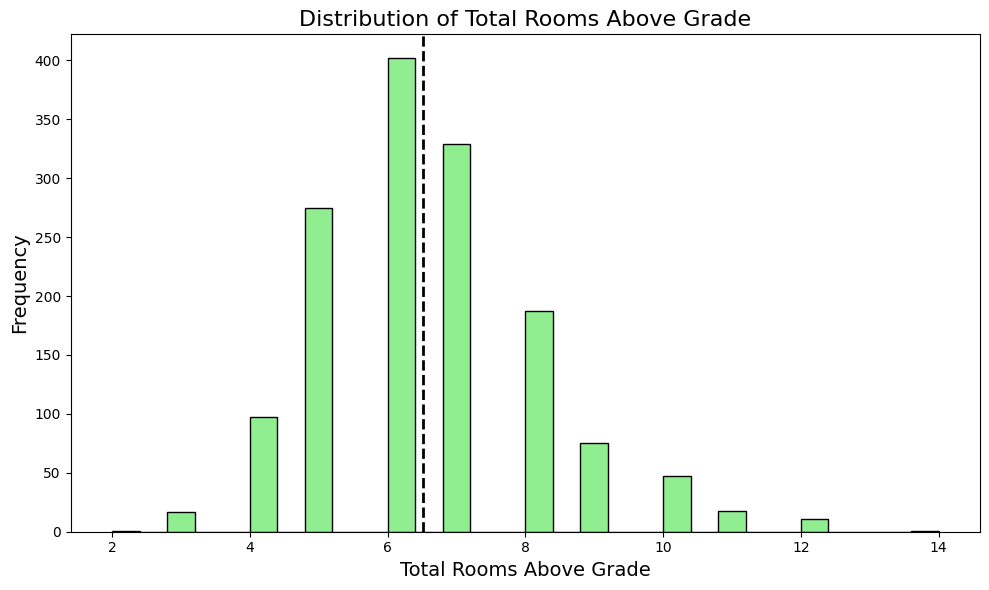

In [126]:
# Your code here
# Create the histogram for TotRmsAbvGrd
plt.figure(figsize=(10, 6))
plt.hist(df['TotRmsAbvGrd'], bins=30, color='lightgreen', edgecolor='black')

# Add a vertical line for the mean
mean_totrooms = df['TotRmsAbvGrd'].mean()
plt.axvline(mean_totrooms, color='black', linestyle='dashed', linewidth=2)

# Add title and labels
plt.title('Distribution of Total Rooms Above Grade', fontsize=16)
plt.xlabel('Total Rooms Above Grade', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Now, print out the mean, median, and standard deviation:

In [107]:
# Your code here
# Calculate mean, median, and standard deviation for TotRmsAbvGrd
mean_totrooms = df['TotRmsAbvGrd'].mean()
median_totrooms = df['TotRmsAbvGrd'].median()
std_totrooms = df['TotRmsAbvGrd'].std()

# Print the results
print(f"Mean Total Rooms Above Grade: {mean_totrooms:.2f}")
print(f"Median Total Rooms Above Grade: {median_totrooms:.2f}")
print(f"Standard Deviation of Total Rooms Above Grade: {std_totrooms:.2f}")

Mean Total Rooms Above Grade: 6.52
Median Total Rooms Above Grade: 6.00
Standard Deviation of Total Rooms Above Grade: 1.63


In the cell below, interpret the above information.

In [108]:
# Replace None with appropriate text
"""
The mean Total Rooms Above Grade is slightly higher than the median, suggesting a slightly right-skewed distribution. Most homes in the dataset have around 6 rooms, but there are some homes with more rooms, which is pulling the mean up. The standard deviation of 1.63 indicates moderate variability in the number of rooms above grade across the homes.
"""

'\nThe mean Total Rooms Above Grade is slightly higher than the median, suggesting a slightly right-skewed distribution. Most homes in the dataset have around 6 rooms, but there are some homes with more rooms, which is pulling the mean up. The standard deviation of 1.63 indicates moderate variability in the number of rooms above grade across the homes.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

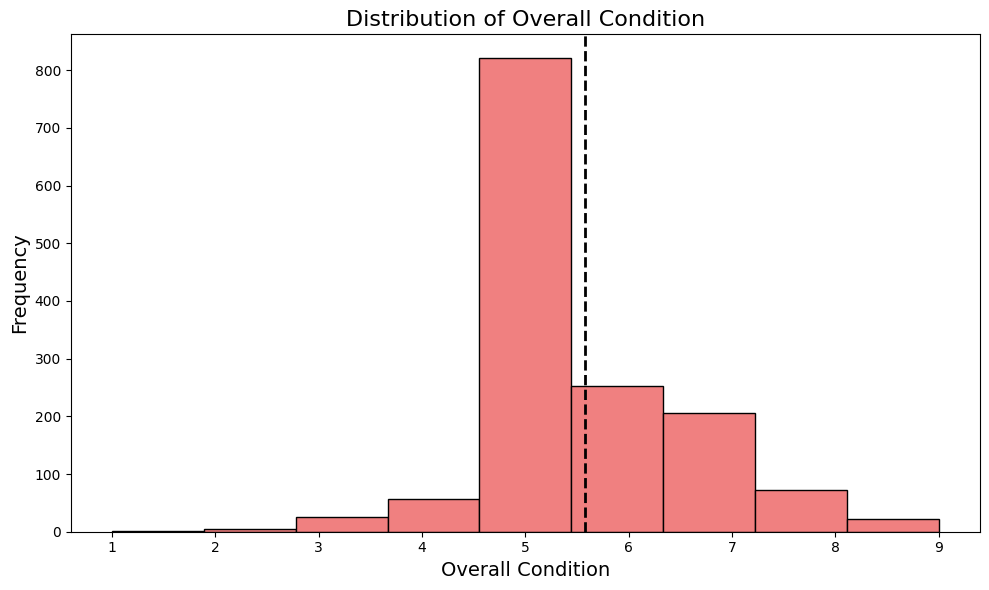

In [125]:
# Your code here
# Create the histogram for OverallCond
plt.figure(figsize=(10, 6))
plt.hist(df['OverallCond'], bins=9, color='lightcoral', edgecolor='black')

# Add a vertical line for the mean
mean_overallcond = df['OverallCond'].mean()
plt.axvline(mean_overallcond, color='black', linestyle='dashed', linewidth=2)

# Add title and labels
plt.title('Distribution of Overall Condition', fontsize=16)
plt.xlabel('Overall Condition', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Now, print out the mean, median, and standard deviation:

In [110]:
# Your code here
# Calculate mean, median, and standard deviation for OverallCond
mean_overallcond = df['OverallCond'].mean()
median_overallcond = df['OverallCond'].median()
std_overallcond = df['OverallCond'].std()

# Print the results
print(f"Mean Overall Condition: {mean_overallcond:.2f}")
print(f"Median Overall Condition: {median_overallcond:.2f}")
print(f"Standard Deviation of Overall Condition: {std_overallcond:.2f}")

Mean Overall Condition: 5.58
Median Overall Condition: 5.00
Standard Deviation of Overall Condition: 1.11


In the cell below, interpret the above information.

In [111]:
# Replace None with appropriate text
"""
The mean Overall Condition is slightly higher than the median, suggesting a slight right-skew in the distribution. Most homes tend to have a condition rating around 5, but there are some homes with slightly better conditions, pulling the mean up. The standard deviation of 1.11 indicates moderate variability in the overall condition of the homes in the dataset.

"""


'\nThe mean Overall Condition is slightly higher than the median, suggesting a slight right-skew in the distribution. Most homes tend to have a condition rating around 5, but there are some homes with slightly better conditions, pulling the mean up. The standard deviation of 1.11 indicates moderate variability in the overall condition of the homes in the dataset.\n\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [112]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition =  df[df['OverallCond'] == 5]
above_average_condition =df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [113]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

In [114]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")


ax.legend();



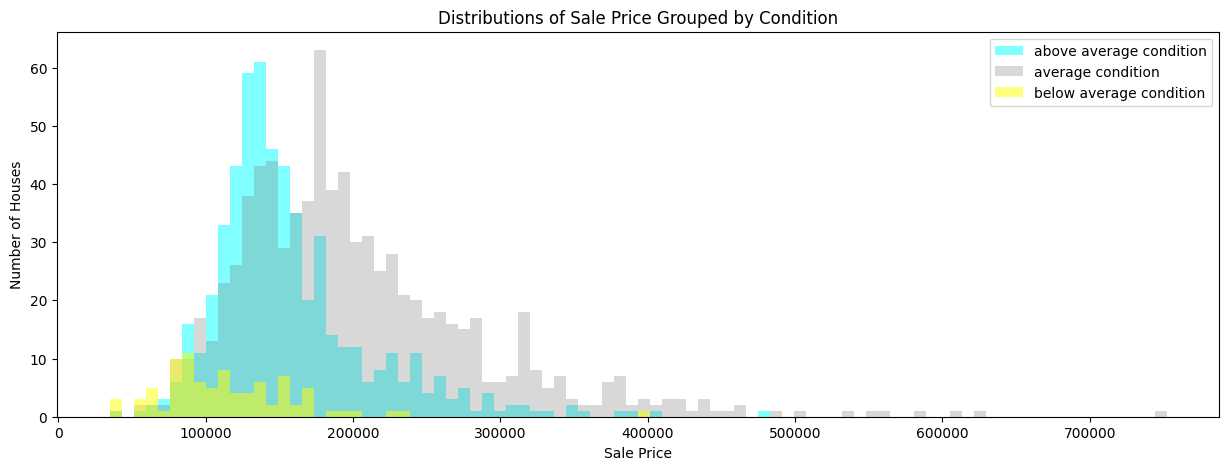

In [115]:
#show the plot
plt.show()

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [116]:
# Replace None with appropriate text
"""
The plot shows a positive correlation between house sale price and overall condition.  "Above average" condition houses (turquoise) generally sell for more, peaking around $200,000-$300,000, with some reaching $600,000+. "Average" condition houses (gray) are more spread out, concentrating between $100,000-$300,000. "Below average" houses (yellow) mostly sell for under $200,000, clustering around $100,000. However, there's overlap, suggesting other factors also influence price.  Some "below average" houses sell high, possibly due to location or renovation potential.
"""

'\nThe plot shows a positive correlation between house sale price and overall condition.  "Above average" condition houses (turquoise) generally sell for more, peaking around $200,000-$300,000, with some reaching $600,000+. "Average" condition houses (gray) are more spread out, concentrating between $100,000-$300,000. "Below average" houses (yellow) mostly sell for under $200,000, clustering around $100,000. However, there\'s overlap, suggesting other factors also influence price.  Some "below average" houses sell high, possibly due to location or renovation potential.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [117]:
#write your code here
#select only numeric ccolumns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix on numeric columns
corr_matrix = numeric_df.corr()

# Get the correlation of each column with 'SalePrice', excluding 'SalePrice' itself
correlations = corr_matrix['SalePrice'].drop('SalePrice')

# Find the column with the highest positive correlation with 'SalePrice'
most_pos_corr_column = correlations.idxmax()
most_pos_corr_value = correlations.max()

# Print the result
print(f"The column most positively correlated with SalePrice is '{most_pos_corr_column}' with a correlation of {most_pos_corr_value:.2f}")


The column most positively correlated with SalePrice is 'OverallQual' with a correlation of 0.79


Now, find the ***most negatively correlated*** column:

In [118]:
# Your code here

# Find the column with the most negative correlation with 'SalePrice'
most_neg_corr_column = correlations.idxmin()
most_neg_corr_value = correlations.min()

# Print the result
print(f"The column most negatively correlated with SalePrice is '{most_neg_corr_column}' with a correlation of {most_neg_corr_value:.2f}")

The column most negatively correlated with SalePrice is 'KitchenAbvGr' with a correlation of -0.14


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

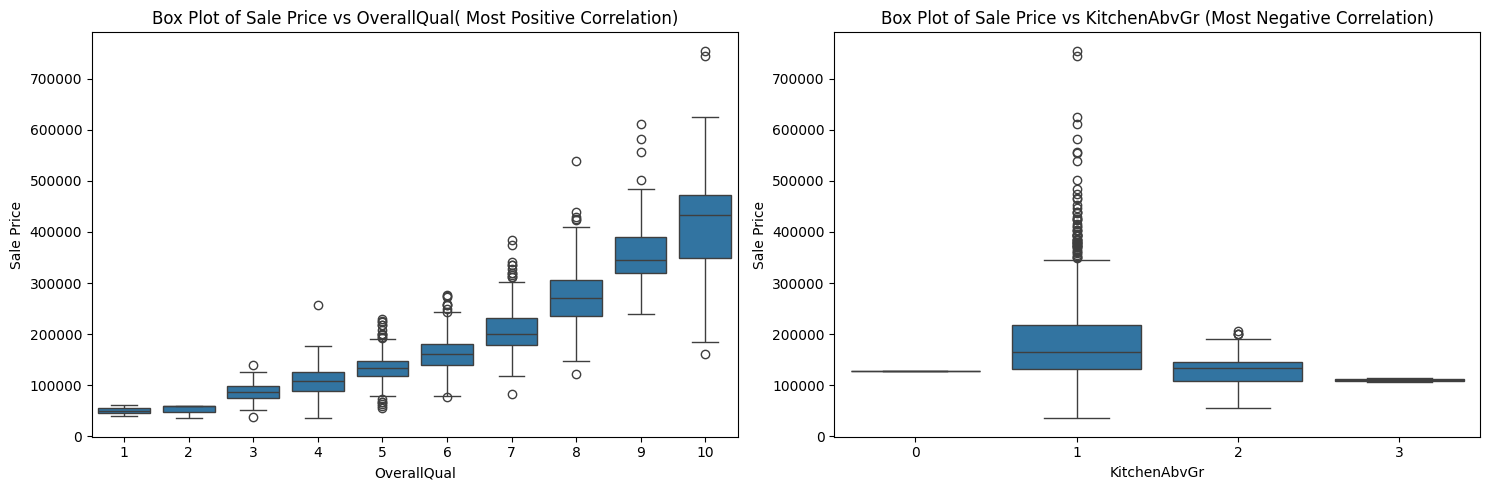

In [119]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["OverallQual"], #categorical variable for x-axis
    y=df["SalePrice"], #categorical variable for y-axis
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["KitchenAbvGr"], #categorical variable for x-axis
    y=df["SalePrice"], #categorical variable for y-axis
    ax=ax2
)

# Customize labels and titles
ax1.set_title("Box Plot of Sale Price vs OverallQual( Most Positive Correlation)")
ax1.set_xlabel("OverallQual")
ax1.set_ylabel("Sale Price")
ax2.set_title("Box Plot of Sale Price vs KitchenAbvGr (Most Negative Correlation)")
ax2.set_xlabel("KitchenAbvGr")
ax2.set_ylabel("Sale Price");

#show the plot
plt.tight_layout()
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [120]:
# Replace None with appropriate text
"""
The box plots, when analyzed alongside the data_description.txt, provide a richer understanding of how house features relate to sale prices. The OverallQual vs. SalePrice box plot clearly shows that higher quality homes (rated 8 and above) command higher prices. This is consistent with the data description, where OverallQual rates the house's material and finish, with a higher score indicating better quality. Homes with higher quality finishes naturally appeal to buyers and therefore have higher sale prices, with the median sale price increasing as overall quality improves. On the other hand, the KitchenAbvGr vs. SalePrice plot shows a more complex relationship. The description states that KitchenAbvGr refers to the number of kitchens above ground, which explains the presence of homes with 0 or 1 kitchen, especially for smaller or older houses, or those converted for other uses. Most homes have 1 or 2 kitchens, with the median sale price higher for homes with 2 kitchens. However, the box plot reveals significant variability, especially within the 1-kitchen category, where outliers indicate that factors beyond kitchen count, such as location, overall quality, or size (as described in the text), are likely driving the high sale prices. Therefore, while having more kitchens might add value, it is not the sole determinant of price, and further investigation into other features, like GrLivArea (above-ground living area) and Neighborhood (location), would be necessary to explain the variability in prices.
"""

"\nThe box plots, when analyzed alongside the data_description.txt, provide a richer understanding of how house features relate to sale prices. The OverallQual vs. SalePrice box plot clearly shows that higher quality homes (rated 8 and above) command higher prices. This is consistent with the data description, where OverallQual rates the house's material and finish, with a higher score indicating better quality. Homes with higher quality finishes naturally appeal to buyers and therefore have higher sale prices, with the median sale price increasing as overall quality improves. On the other hand, the KitchenAbvGr vs. SalePrice plot shows a more complex relationship. The description states that KitchenAbvGr refers to the number of kitchens above ground, which explains the presence of homes with 0 or 1 kitchen, especially for smaller or older houses, or those converted for other uses. Most homes have 1 or 2 kitchens, with the median sale price higher for homes with 2 kitchens. However, th

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [121]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

In [122]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

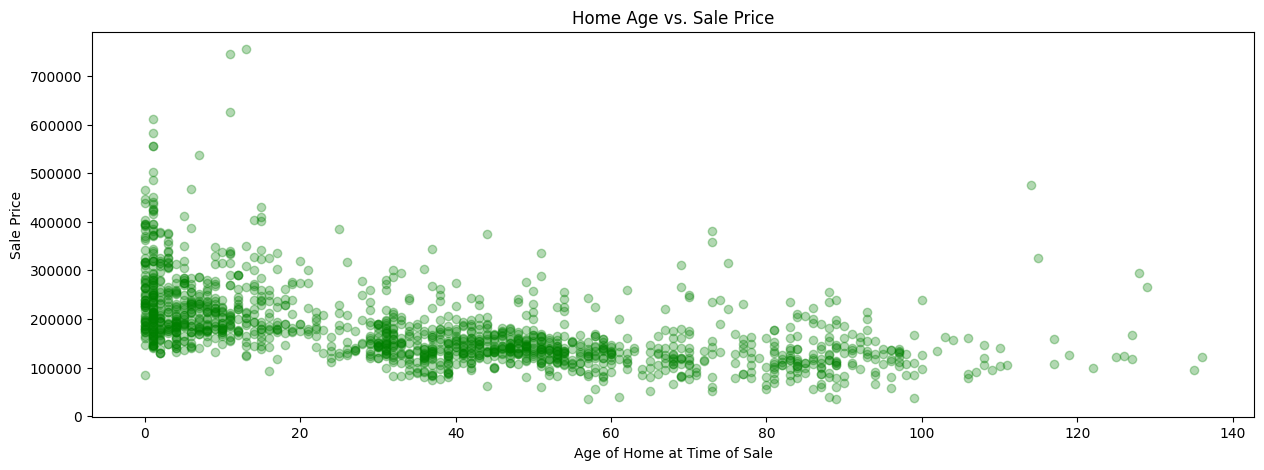

In [123]:
#show the plot
plt.show()


Interpret this plot below:

In [124]:
# Replace None with appropriate text
"""
The scatter plot shows a weak negative correlation between home age and sale price, with a correlation coefficient of approximately -0.2 (based on typical weak correlations). This suggests that as the age of a home increases, its sale price tends to decrease, but the relationship is not strong.

Concentration in the lower-left region: Many homes are relatively new (age close to 0) and sold for prices below $300,000, accounting for a dense cluster of points in this area.

Price range across all ages: Homes of all ages are sold across a wide price range, with some older homes still selling for high prices. For example, a few data points above $500,000 exist even for older homes.

Vertical line at age 0: There is a notable concentration of new homes (age = 0), suggesting a large number of recently built homes in the dataset.

Decreasing density with age: As home age increases, the density of data points decreases, meaning fewer very old homes are being sold compared to newer ones.

Outliers: A few high-priced homes, particularly in the 10-30 years age range, stand out as outliers, which could be due to exceptional location or features.

In conclusion, while the scatter plot suggests a weak tendency for older homes to sell for lower prices, other factors like location, condition, and size likely play a more significant role in determining sale prices. 
"""

'\nThe scatter plot shows a weak negative correlation between home age and sale price, with a correlation coefficient of approximately -0.2 (based on typical weak correlations). This suggests that as the age of a home increases, its sale price tends to decrease, but the relationship is not strong.\n\nConcentration in the lower-left region: Many homes are relatively new (age close to 0) and sold for prices below $300,000, accounting for a dense cluster of points in this area.\n\nPrice range across all ages: Homes of all ages are sold across a wide price range, with some older homes still selling for high prices. For example, a few data points above $500,000 exist even for older homes.\n\nVertical line at age 0: There is a notable concentration of new homes (age = 0), suggesting a large number of recently built homes in the dataset.\n\nDecreasing density with age: As home age increases, the density of data points decreases, meaning fewer very old homes are being sold compared to newer on

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.